In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


2025-07-19 19:32:41.699763: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-19 19:32:41.700145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 19:32:41.702891: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 19:32:41.711090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752946361.724483   48386 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752946361.72

In [2]:
data = pd.read_csv("data/preprocessed.csv")
m = len(data)
test, cv, train = data.iloc[:round(0.1*m)], data.iloc[round(0.1*m): round(0.2*m)], data.iloc[round(0.2*m):]
x_cols = data.columns.drop(["winner"])
X_test, y_test = test[test["winner"] != 0.5][x_cols].values, test[test["winner"] != 0.5]["winner"].values
X_cv, y_cv = cv[cv["winner"] != 0.5][x_cols].values, cv[cv["winner"] != 0.5]["winner"].values
X_train, y_train = train[x_cols].values, train["winner"].values

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential(
    [
        Input(shape=(X_train.shape[1],)),
        Dense(units = 16, activation="relu", kernel_regularizer=L2(l2= 0.3)),
        Dense(units = 1, activation="sigmoid")
    ]
)


2025-07-19 19:32:44.198321: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.compile(
    loss= BinaryCrossentropy(from_logits= True),
    optimizer= Adam()
)
history= model.fit(
    X_train_scaled, y_train,
    validation_data= (X_cv_scaled, y_cv),
    epochs = 100,
    verbose= 1,
    callbacks= [
        tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
    ]
)

Epoch 1/100


/home/luka/Documents/Python_projekti/ufc_pred/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.7904 - val_loss: 3.3145
Epoch 2/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2450 - val_loss: 0.8372
Epoch 3/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7494 - val_loss: 0.6817
Epoch 4/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6571 - val_loss: 0.6790
Epoch 5/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6509 - val_loss: 0.6709
Epoch 6/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6489 - val_loss: 0.6770
Epoch 7/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6652 - val_loss: 0.6695
Epoch 8/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6602 - val_loss: 0.6764
Epoch 9/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6594 - val_loss: 0.6875
Epoch 10/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6581 - val_loss: 0.6816
Epoch 11/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6576 - val_loss: 0.6683
Epoch 12/100
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

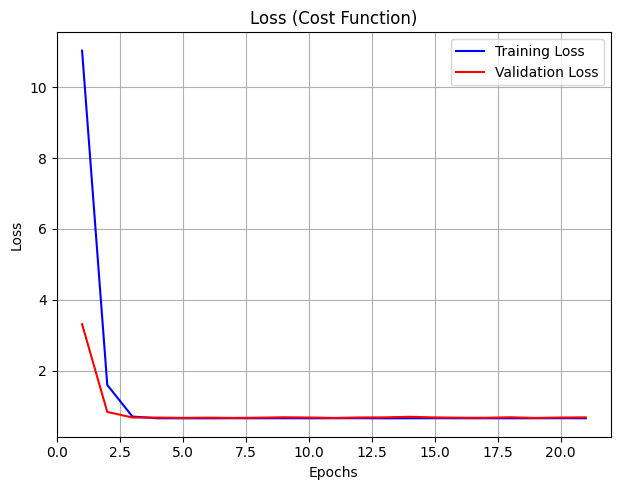

In [6]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss (Cost Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Max f1 score = 0.6077348066298343
threshold for max f1 score = 0.5835835835835835
Max acc score = 0.634508348794063
threshold for max acc score = 0.48648648648648646


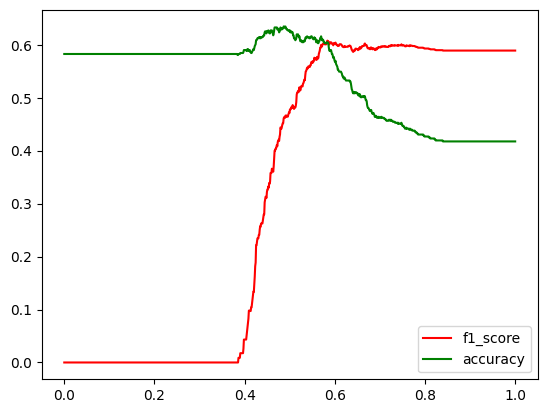

In [7]:
result = model.predict(X_cv_scaled)
result=result.flatten()
thresholds = np.linspace(0,1, num=1000)
f1_values = []
acc_values = []
max_f1 = 0
best_thresh_f1 = 0
max_acc = 0
best_thresh_acc = 0

for thresh in thresholds:
    ypred = np.where(result > thresh, 1, 0)
    f1 = f1_score(y_cv, ypred,pos_label= 0)
    acc = accuracy_score(y_cv,ypred)
    if f1 > max_f1:
        max_f1 = f1
        best_thresh_f1 = thresh
    if acc > max_acc:
        max_acc = acc
        best_thresh_acc = thresh
    f1_values.append(f1)
    acc_values.append(acc)

plt.plot(thresholds, np.array(f1_values),color= "r", label= "f1_score")
plt.plot(thresholds, np.array(acc_values),color= "g", label= "accuracy")
plt.legend()

print(f"Max f1 score = {max_f1}")
print(f"threshold for max f1 score = {best_thresh_f1}")
print(f"Max acc score = {max_acc}")
print(f"threshold for max acc score = {best_thresh_acc}")

In [8]:
accuracy_score(y_test, np.where(model.predict(X_test_scaled).flatten() > 0.5, 1,0))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.6238532110091743